# Implementation of Logistic Regression

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math


### Data set:

In [18]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

### plot the data set

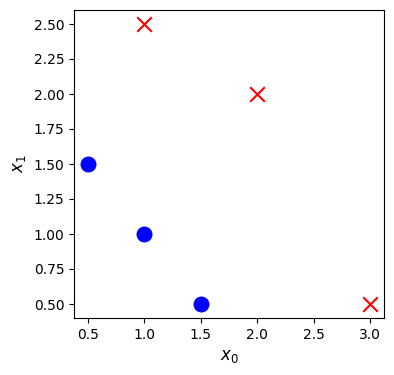

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
m = X_train.shape[0]
for i in range(m):
    if y_train[i] == 1:
        ax.scatter(X_train[i,0], X_train[i,1], c="r", marker="x", s=110)
    else:
        ax.scatter(X_train[i,0], X_train[i,1], c="b", marker="o", s=110)
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)
plt.show()

### implementation of sigmoid func

In [20]:
def sigmiod(z):
    g = 1 / (1 + np.exp(- z))
    return g

### Implementation of Cost func

In [21]:
def cost_function(X, y, w, b):
    
    m = X.shape[0]
    cost = 0
    for i in range(m):
        z = X[i] @ w + b
        f_wb = sigmiod(z)
        loss = y[i] * np.log(f_wb) + (1 - y[i]) * np.log(1 - f_wb)
        cost = cost + loss
    total_cost = -(cost/m)

    return total_cost


### gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

## Implementation of gradient func

In [22]:
def gradient_func_logistic(X, y, w, b):
    
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        
        z = X[i]@w + b
        f_wb = sigmiod(z)
        err = f_wb - y[i]
        dj_db = dj_db + err
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
            
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

## implementation of gradient decsent for logistic regression

In [23]:
def gradient_decsent_logistic(X, y, w_in, b_in, alpha, num_iter):
    
    w = copy.deepcopy(w_in)
    b = b_in
    J_hist = []
    for i in range(num_iter):
        dj_dw, dj_db = gradient_func_logistic(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_hist.append(cost_function(X, y, w, b))
            
        if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1]}   ")
            
    return w, b, J_hist
        

In [24]:
n = X_train.shape[1]
w_tmp  = np.zeros(n)
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_decsent_logistic(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


### plot the result and decision boundry

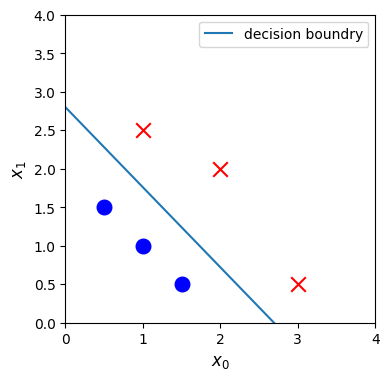

In [25]:
m = X_train.shape[0]
predic = np.zeros(m)
for i in range(m):
    z = w_out@X_train[i] + b_out
    predic[i] = sigmiod(z)
fig, ax = plt.subplots(1, 1, figsize=(4,4))
for i in range(m):
    if predic[i] >= 0.5:
        ax.scatter(X_train[i,0], X_train[i,1], c="r", marker="x", s=110)
    else:
        ax.scatter(X_train[i,0], X_train[i,1], c="b", marker="o", s=110)
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_ylabel('$x_1$', fontsize=12)

x0 = np.arange(0,6)
x1 = - (w_out[0] * x0 + b_out) / w_out[1]
ax.axis([0, 4, 0, 4])
ax.plot(x0, x1, label="decision boundry")
plt.legend()
plt.show()

we can see our perdiction is awsome :)

## Another data set

In [26]:
x_train2 = np.array([[0.], [1],[2], [3], [4],[ 5]])
y_train2 = np.array([0,  0, 0, 1, 1, 1])

### plot the data set

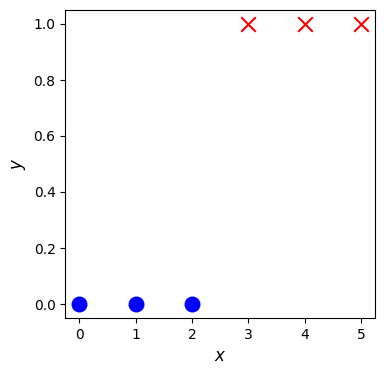

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
m = x_train2.shape[0]
for i in range(m):
    if y_train2[i] == 1:
        ax.scatter(x_train2[i,0], y_train2[i], c="r", marker="x", s=110)
    else:
        ax.scatter(x_train2[i,0], y_train2[i], c="b", marker="o", s=110)
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
plt.show()

### run the gradiene descent for the new data set

In [28]:
w_tmp  = np.array([0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out2, b_out2, _ = gradient_decsent_logistic(x_train2, y_train2, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.6433158133057238   
Iteration 1000: Cost 0.1132929921599034   
Iteration 2000: Cost 0.07793458704949963   
Iteration 3000: Cost 0.0611139750771269   
Iteration 4000: Cost 0.05067060233609751   
Iteration 5000: Cost 0.04339775780412448   
Iteration 6000: Cost 0.03799053561526236   
Iteration 7000: Cost 0.03379355724130196   
Iteration 8000: Cost 0.030433646671395555   
Iteration 9000: Cost 0.0276797908056348   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


### plot the result

In [29]:
def predict(X, w, b): 

    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):  
        
        z = np.dot(X[i], w) + b
        f_wb = sigmiod(z)
        if f_wb >= 0.5:
            p[i] = 1
        else: 
            p[i] = 0
    return p

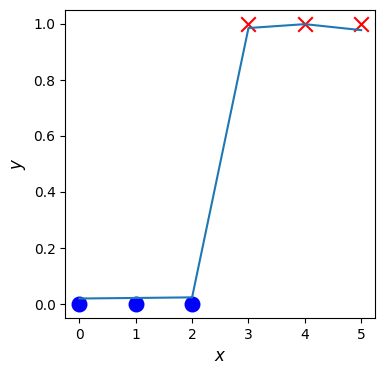

In [30]:
p =  predict(x_train2, w_out2, b_out2)

fig, ax = plt.subplots(1, 1, figsize=(4,4))
m = x_train2.shape[0]
for i in range(m):
    if y_train2[i] == 1:
        ax.scatter(x_train2[i,0], y_train2[i], c="r", marker="x", s=110)
    else:
        ax.scatter(x_train2[i,0], y_train2[i], c="b", marker="o", s=110)

ax.plot(x_train2, predic)
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)

plt.show()

### Now let's use this to compute the accuracy on the training set

In [32]:
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 100.000000
